In [53]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.stats import linregress

In [2]:
# import .csv
csv_path = "wine_data.csv"
wine_df = pd.read_csv(csv_path, low_memory=False)
wine_df

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot
134426,South Africa,82,14.0,Paarl,NaN,Merlot


In [3]:
# jeanaej's code starts here

In [4]:
# Read the cleaned wine data csv
wine_data = pd.read_csv("wine_data.csv")
wine_data.head()

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir


In [5]:
# Get the countries
countries = wine_data["Country"].unique()
countries = sorted(countries)
countries

['Argentina',
 'Australia',
 'Austria',
 'Chile',
 'France',
 'Germany',
 'Italy',
 'New Zealand',
 'Portugal',
 'South Africa',
 'Spain',
 'US']

In [6]:
# Grouping by country
country_group = wine_data.groupby(["Country"])
points_c_mean = country_group["Points"].mean()
price_c_mean = country_group["Price"].mean()
points_c_median = country_group["Points"].median()
price_c_median = country_group["Price"].median()

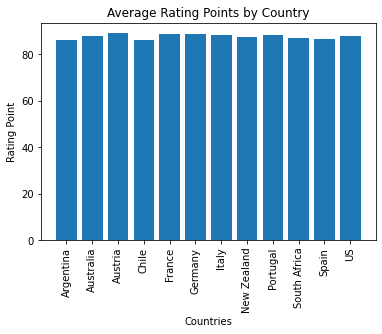

In [7]:
# Creating a bar graph Average rating by country
plt.bar(countries, points_c_mean, align = "center")

plt.title("Average Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Rating Point")
plt.xticks(rotation = 90)
plt.show()

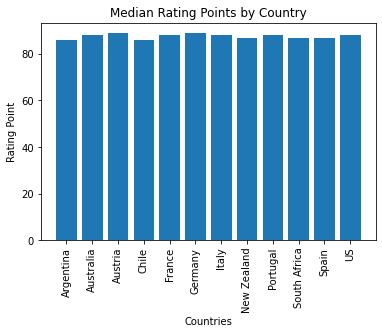

In [8]:
# Creating a bar graph Median rating by country
plt.bar(countries, points_c_median, align = "center")

plt.title("Median Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Rating Point")
plt.xticks(rotation = 90)
plt.show()

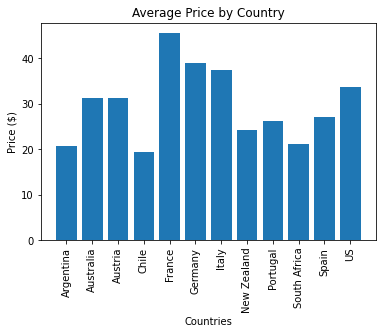

In [9]:
# Creating a bar graph Price by country
plt.bar(countries, price_c_mean, align = "center")

plt.title("Average Price by Country")
plt.xlabel("Countries")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

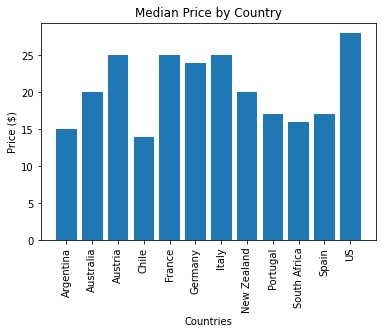

In [10]:
# Creating a bar graph Price by country
plt.bar(countries, price_c_median, align = "center")

plt.title("Median Price by Country")
plt.xlabel("Countries")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Grouping by country
variety_group = wine_data.groupby(["Variety"])
points_v_mean = variety_group["Points"].mean()
price_v_mean = variety_group["Price"].mean()
points_v_median = variety_group["Points"].median()
price_v_median = variety_group["Price"].median()
varieties = wine_data["Variety"].unique()
varieties = sorted(varieties)
varieties

['Aglianico',
 'Airen',
 'Albana',
 'Albariño',
 'Albarossa',
 'Albarín',
 'Aleatico',
 'Alfrocheiro',
 'Alicante',
 'Alicante Bouschet',
 'Aligoté',
 'Alsace white blend',
 'Altesse',
 'Alvarelhão',
 'Alvarinho',
 'Alvarinho-Chardonnay',
 'Angevine',
 'Ansonica',
 'Antão Vaz',
 'Apple',
 'Aragonez',
 'Aragonês',
 'Arinto',
 'Arneis',
 'Austrian Red Blend',
 'Austrian white blend',
 'Auxerrois',
 'Avesso',
 'Azal',
 'Baco Noir',
 'Baga',
 'Baga-Touriga Nacional',
 'Barbera',
 'Bastardo',
 'Bical',
 'Black Monukka',
 'Black Muscat',
 'Blauburgunder',
 'Blauer Portugieser',
 'Blaufränkisch',
 'Bobal',
 'Bombino Bianco',
 'Bonarda',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Bovale',
 'Brachetto',
 'Braucol',
 'Bual',
 'Bukettraube',
 'Cabernet',
 'Cabernet Blend',
 'Cabernet Franc',
 'Cabernet Franc-Cabernet Sauvignon',
 'Cabernet Franc-Carmenère',
 'Cabernet Franc-Malbec',
 'Cabernet Franc-Merlot',
 'Cabernet Franc-Tempranillo',
 'Cabernet Merlot',
 'Cabernet Pfeffer'

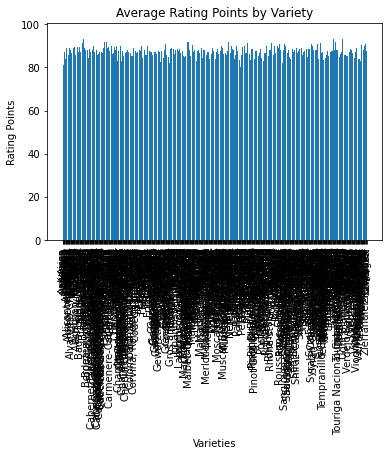

In [12]:
# Creating a bar graph Average points by varietal
plt.bar(varieties, points_v_mean, align = "center")

plt.title("Average Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)
plt.show()

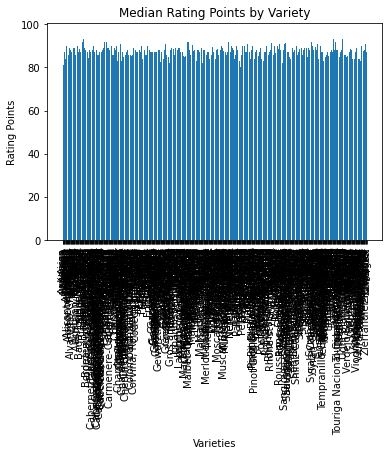

In [13]:
# Creating a bar graph Average points by varietal
plt.bar(varieties, points_v_median, align = "center")

plt.title("Median Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)
plt.show()

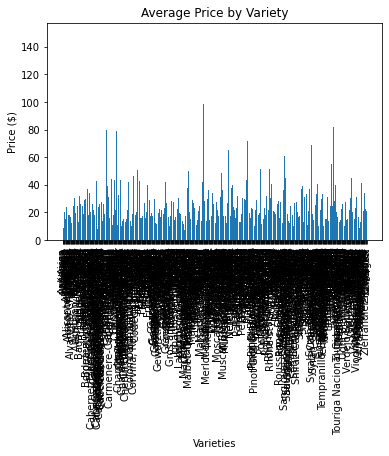

In [14]:
# Creating a bar graph Average Price by varietal
plt.bar(varieties, price_v_mean, align = "center")

plt.title("Average Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

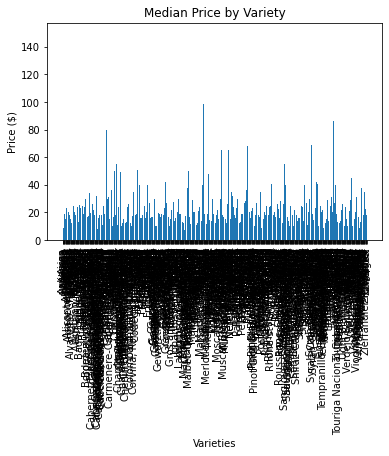

In [15]:
# Creating a bar graph Average Price by varietal
plt.bar(varieties, price_v_median, align = "center")

plt.title("Median Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

In [16]:
# Getting $40 or more
wine_over_40 = wine_data.loc[wine_data["Price"] >= 40]
wine_over_40

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134348,South Africa,87,45.0,Stellenbosch,NaN,Sauvignon Blanc
134352,South Africa,87,48.0,Stellenbosch,NaN,Cabernet Sauvignon
134361,South Africa,85,46.0,Stellenbosch,NaN,Cabernet Sauvignon
134373,South Africa,91,68.0,Paarl,NaN,Shiraz


In [17]:
# Grouping by Variety
variety_o40_group = wine_over_40.groupby(["Variety"])
points_v_o40_mean = variety_group["Points"].mean()
price_v_o40_mean = variety_group["Price"].mean()
varieties_o40 = wine_data["Variety"].unique()
varieties_o40 = sorted(varieties)
price_v_o40_mean

Variety
Aglianico                 33.169884
Airen                      8.833333
Albana                    33.933333
Albariño                  19.982987
Albarossa                 40.000000
                            ...    
Zibibbo                   34.258065
Zierfandler               39.500000
Zierfandler-Rotgipfler    22.500000
Zinfandel                 26.776899
Zweigelt                  21.276382
Name: Price, Length: 545, dtype: float64

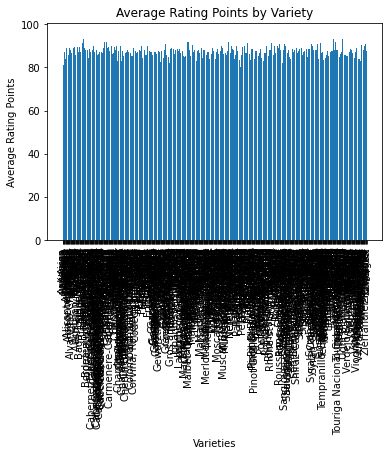

In [18]:
# Creating a bar graph Average points by varietal
plt.bar(varieties_o40, points_v_o40_mean, align = "center")

plt.title("Average Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Average Rating Points")
plt.xticks(rotation = 90)
plt.show()

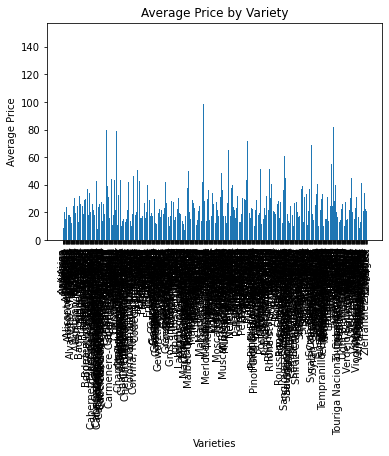

In [19]:
# Creating a bar graph Average Price by varietal
plt.bar(varieties_o40, price_v_o40_mean, align = "center")

plt.title("Average Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Average Price")
plt.xticks(rotation = 90)
plt.show()

In [20]:
# to do the over $40 need to get the average that is over $40. Think of possibly doing a For Loop?

In [21]:
# jeannaej's code ends here

In [22]:
# natalia's code starts here

In [23]:
wine_df.nunique()

Country       12
Points        21
Price        355
Province     244
Region      1186
Variety      545
dtype: int64

In [24]:
US_only = wine_df.loc[wine_df["Country"] == "US"]
US_only

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
62134,US,82,10.0,California,California,Merlot
62135,US,82,10.0,California,California,Pinot Noir
62136,US,94,25.0,California,Anderson Valley,White Riesling
62137,US,93,30.0,California,North Coast,White Blend


In [25]:
us_var = US_only.groupby("Variety")
us_varieties = us_var.count()
us_varieties

,Country,Points,Price,Province,Region
Variety,,,,,
Aglianico,11,11,11,11,11
Albariño,89,89,89,89,89
Aleatico,2,2,2,2,2
Alicante Bouschet,7,7,7,7,7
Aligoté,10,10,10,10,10
...,...,...,...,...,...
Viognier-Valdiguié,1,1,1,1,1
White Blend,663,663,663,663,655
White Riesling,32,32,32,32,32


In [26]:
# Summing all varieties that will be lummped together
other = 0
for variety, row in us_varieties.iterrows():
    if row["Country"] < 1000:
        added = row["Country"]
        other = other + added
    else:
        pass
        
print(other)

12575


In [27]:
# Returns the top 40 varietals from US wineries
us_var_top = us_varieties.loc[us_varieties["Country"] >= 1000]

In [28]:
us_var_top.head()

,Country,Points,Price,Province,Region
Variety,,,,,
Bordeaux-style Red Blend,1829,1829,1829,1829,1824
Cabernet Franc,1008,1008,1008,1008,1008
Cabernet Sauvignon,9142,9142,9142,9142,9132
Chardonnay,8101,8101,8101,8101,8090
Merlot,3622,3622,3622,3622,3615


In [29]:
us_var_top.loc["Other Wine (206 Varietals)"] = [12575,12575,12575,12575,12575]
us_var_top = us_var_top.sort_values(by="Country", ascending=False)
us_var_top

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country,Points,Price,Province,Region
Variety,,,,,
Other Wine (206 Varietals),12575,12575,12575,12575,12575
Pinot Noir,10265,10265,10265,10265,10265
Cabernet Sauvignon,9142,9142,9142,9142,9132
Chardonnay,8101,8101,8101,8101,8090
Syrah,4259,4259,4259,4259,4249
Zinfandel,3785,3785,3785,3785,3785
Merlot,3622,3622,3622,3622,3615
Red Blend,3320,3320,3320,3320,3303
Sauvignon Blanc,2582,2582,2582,2582,2581


In [30]:
# Labels for the sections of our pie chart
labels = us_var_top.index

# The values of each section of the pie chart
sizes = us_var_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

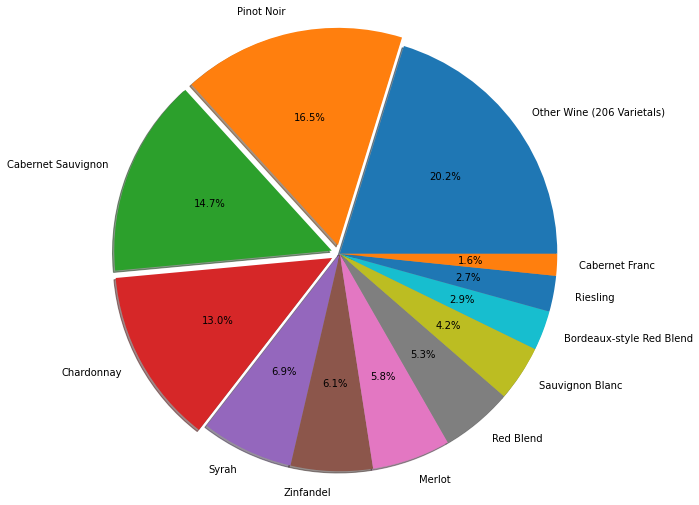

In [31]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, radius=2.5)
plt.show()

In [32]:
province = US_only.groupby("Province").count().sort_values(by="Country", ascending=False)
province

,Country,Points,Price,Region,Variety
Province,,,,,
California,44356,44356,44356,44356,44356
Washington,9684,9684,9684,9684,9684
Oregon,4571,4571,4571,4571,4571
New York,2415,2415,2415,2415,2415
Virginia,508,508,508,508,508
Idaho,136,136,136,30,136
New Mexico,95,95,95,95,95
Missouri,60,60,60,60,60
Pennsylvania,50,50,50,50,50


In [33]:
# Summing all varieties that will be lummped together
other_prov = 0
for prov, row in province.iterrows():
    if row["Country"] < 100:
        added_prov = row["Country"]
        other_prov = other_prov + added_prov
    else:
        pass
        
print(other_prov)

469


In [34]:
# Returns the top wine producing provinces in the US
province_top = province.loc[province["Country"] >1000]
province_top

,Country,Points,Price,Region,Variety
Province,,,,,
California,44356,44356,44356,44356,44356
Washington,9684,9684,9684,9684,9684
Oregon,4571,4571,4571,4571,4571
New York,2415,2415,2415,2415,2415


In [35]:
province_top.loc["Other Provinces (469 Provinces)"] = [469,469,469,469,469]
province_top = province_top.sort_values(by="Country", ascending=False)
province_top

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country,Points,Price,Region,Variety
Province,,,,,
California,44356,44356,44356,44356,44356
Washington,9684,9684,9684,9684,9684
Oregon,4571,4571,4571,4571,4571
New York,2415,2415,2415,2415,2415
Other Provinces (469 Provinces),469,469,469,469,469


In [36]:
# Labels for the sections of our pie chart
labels = province_top.index

# The values of each section of the pie chart
sizes = province_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0.1, 0, 0, 0, 0)

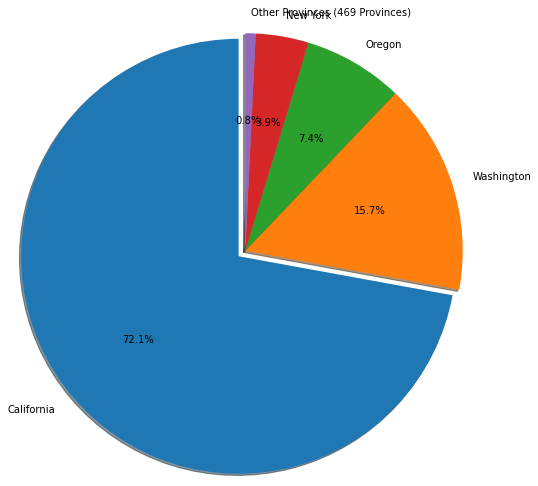

In [37]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, radius=2.5)
plt.show()

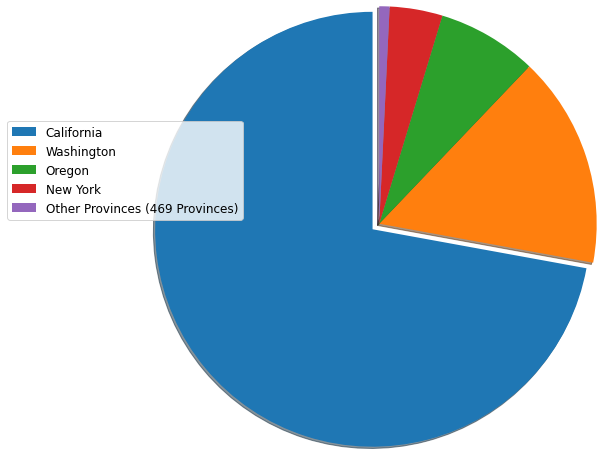

In [38]:
patches, text = plt.pie(sizes, shadow=True, explode=explode, startangle=90, radius=2.5)
    
plt.legend(patches, labels, loc="best", bbox_to_anchor=(-0.1,1.), fontsize=12)
plt.show()

# Avoiding overlapping labels
# https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart 
# Accessed 14 Feb 2021

In [39]:
ratio_df = wine_df
ratio_df["Points:Price"] = ratio_df["Points"]/ratio_df["Price"]
ratio_df

,Country,Points,Price,Province,Region,Variety,Points:Price
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,0.408511
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc,1.066667
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,1.476923
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,1.461538
4,US,95,60.0,California,Sonoma Coast,Pinot Noir,1.583333
...,...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage,5.533333
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend,5.187500
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot,5.466667
134426,South Africa,82,14.0,Paarl,NaN,Merlot,5.857143


In [40]:
mean = ratio_df.groupby("Country").mean()
mean

,Points,Price,Points:Price
Country,,,
Argentina,86.001074,20.794881,5.906814
Australia,87.881488,31.258480,4.530457
Austria,89.190898,31.192106,3.762616
Chile,86.298127,19.344780,6.065113
France,88.603314,45.619885,3.745917
Germany,88.610567,39.011078,3.841479
Italy,88.445006,37.547913,3.727403
New Zealand,87.542671,24.173290,4.381576
Portugal,88.176724,26.332615,5.595943


In [41]:
median = ratio_df.groupby("Country").median()
median

,Points,Price,Points:Price
Country,,,
Argentina,86,15.0,5.866667
Australia,88,20.0,4.350000
Austria,89,25.0,3.625000
Chile,86,14.0,6.107143
France,88,25.0,3.461538
Germany,89,24.0,3.600000
Italy,88,25.0,3.461538
New Zealand,87,20.0,4.400000
Portugal,88,17.0,5.235294


In [42]:
mean_median = pd.merge(mean, median, left_index=True, right_index=True, suffixes=("_mean","_median"))
best = mean_median.sort_values(by="Points:Price_mean", ascending=False)

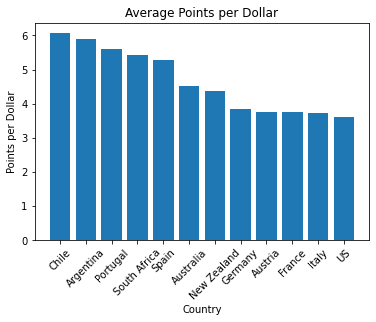

In [43]:
x_axis_country = best.index
point_per = best["Points:Price_mean"]
plt.bar(x_axis_country, point_per, align="center")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Points per Dollar")
plt.title("Average Points per Dollar")

plt.show()

In [44]:
# natalia's code ends here

In [45]:
# sharon's code starts here

In [119]:
# Linear Regression... is there a correlation between price and rating
# Can we predict the rating based on price?

wine_df
us_wine_df = wine_df.loc[wine_df['Country'] == 'US']
# Dropping "extreme, obvious" outliers
us_wine_df = us_wine_df.loc[us_wine_df['Price'] < 500.0]
us_wine_df

,Country,Points,Price,Province,Region,Variety,Points:Price
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,0.408511
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc,1.066667
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,1.476923
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,1.461538
4,US,95,60.0,California,Sonoma Coast,Pinot Noir,1.583333
...,...,...,...,...,...,...,...
62134,US,82,10.0,California,California,Merlot,8.200000
62135,US,82,10.0,California,California,Pinot Noir,8.200000
62136,US,94,25.0,California,Anderson Valley,White Riesling,3.760000
62137,US,93,30.0,California,North Coast,White Blend,3.100000


In [120]:
# TODO: add the (x,y) values for the annotation so the equation shows up on the graph
# Use strict outliers?  Or just the extreme outliers... maybe try the strict first

def wine_regression(x_values, y_values, wine_variety):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values, marker="o", facecolor="maroon", alpha=0.4)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (80, 250), fontsize=15, color = "blue")
    plt.ylabel("Price of Wine (per bottle)")
    plt.xlabel("Rating of Wine (in Points)")
    plt.title(f"{wine_variety}: Wine Rating versus Price")
    plt.show()

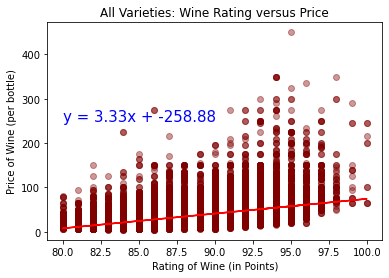

In [121]:
y_values = us_wine_df['Price']
x_values = us_wine_df['Points']

wine_regression(x_values, y_values, 'All Varieties')

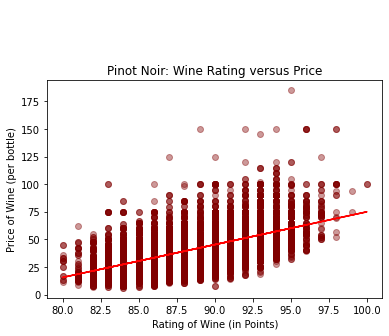

In [122]:
# Pinot Noir
us_pinot_df = us_wine_df.loc[us_wine_df['Variety'] == 'Pinot Noir']
x_values = us_pinot_df['Points']
y_values = us_pinot_df['Price']

wine_regression(x_values, y_values, 'Pinot Noir')

In [123]:
## find Price outliers for boxplot (see below)
pinots = np.asarray(us_pinot_df['Price'])

pinot_quartiles = pd.DataFrame(pinots).quantile([.25,.5,.75], axis=0)
pinot_quartiles


,0
0.25,30.0
0.50,40.0
0.75,50.0


In [124]:
pinot_lowerq = pinot_quartiles.loc[0.25]  #TODO: this reference needs to be cleaned up
pinot_median = pinot_quartiles.loc[0.50]
pinot_upperq = pinot_quartiles.loc[0.75]
pinot_iqr = pinot_upperq - pinot_lowerq

print(f'The lower quartile of Price for Pinot Noir is: {pinot_lowerq[0]}')
print(f'The upper quartile of Price for Pinot Noir is: {pinot_upperq[0]}')
print(f'The interquartile range of Price for Pinot Noir is: {pinot_iqr[0]}')
print(f'The median of Price for Pinot Noir is: {pinot_median[0]}')

pinot_lower_bound = pinot_lowerq - (1.5*pinot_iqr)
pinot_upper_bound = pinot_upperq + (1.5*pinot_iqr)

print(f'Pinot Noir Price below {pinot_lower_bound[0]} could be outliers.')
print(f'Pinot Noir Price above {pinot_upper_bound[0]} could be outliers.')

The lower quartile of Price for Pinot Noir is: 30.0
The upper quartile of Price for Pinot Noir is: 50.0
The interquartile range of Price for Pinot Noir is: 20.0
The median of Price for Pinot Noir is: 40.0
Pinot Noir Price below 0.0 could be outliers.
Pinot Noir Price above 80.0 could be outliers.


In [125]:
## re-run the linear regression HERE - TODO

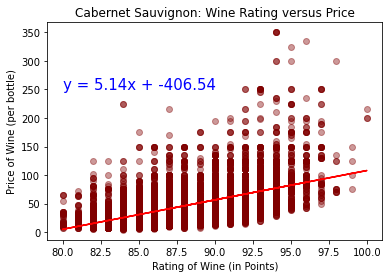

In [126]:
# Cabernet Sauvignon
us_cab_df = us_wine_df.loc[us_wine_df['Variety'] == 'Cabernet Sauvignon']
x_values = us_cab_df['Points']
y_values = us_cab_df['Price']

wine_regression(x_values, y_values, 'Cabernet Sauvignon')

In [127]:
## find Price outliers for boxplot (see below)
cabs = np.asarray(us_cab_df['Price'])  #Cabernet Sauvignon

cabs_quartiles = pd.DataFrame(cabs).quantile([.25,.5,.75], axis=0)
cabs_quartiles


,0
0.25,25.0
0.50,40.0
0.75,65.0


In [128]:
cabs_lowerq = cabs_quartiles.loc[0.25]  #TODO: this reference needs to be cleaned up
cabs_median = cabs_quartiles.loc[0.50]
cabs_upperq = cabs_quartiles.loc[0.75]
cabs_iqr = cabs_upperq - cabs_lowerq

print(f'The lower quartile of Price for Cabernet Sauvignon is: {cabs_lowerq[0]}')
print(f'The upper quartile of Price for Cabernet Sauvignon is: {cabs_upperq[0]}')
print(f'The interquartile range of Price for Cabernet Sauvignon is: {cabs_iqr[0]}')
print(f'The median of Price for Cabernet Sauvignon is: {cabs_median[0]}')

cabs_lower_bound = cabs_lowerq - (1.5*cabs_iqr)
cabs_upper_bound = cabs_upperq + (1.5*cabs_iqr)

print(f'Cabernet Sauvignon Price below {cabs_lower_bound[0]} could be outliers.')
print(f'Cabernet Sauvignon Price above {cabs_upper_bound[0]} could be outliers.')

The lower quartile of Price for Cabernet Sauvignon is: 25.0
The upper quartile of Price for Cabernet Sauvignon is: 65.0
The interquartile range of Price for Cabernet Sauvignon is: 40.0
The median of Price for Cabernet Sauvignon is: 40.0
Cabernet Sauvignon Price below -35.0 could be outliers.
Cabernet Sauvignon Price above 125.0 could be outliers.


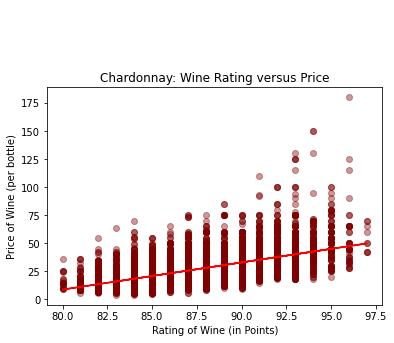

In [129]:
# Chardonnay  This is a good candidate for a box plot b/c of the outlier
us_chard_df = us_wine_df.loc[us_wine_df['Variety'] == 'Chardonnay']
us_chard_df = us_chard_df.loc[us_chard_df['Price'] < 250]

x_values = us_chard_df['Points']
y_values = us_chard_df['Price']

wine_regression(x_values, y_values, 'Chardonnay')

In [130]:
## find Price outliers for boxplot (see below)
chards = np.asarray(us_chard_df['Price'])  #Chardonnay

chard_quartiles = pd.DataFrame(chards).quantile([.25,.5,.75], axis=0)
chard_quartiles

,0
0.25,17.0
0.50,25.0
0.75,35.0


In [131]:
chard_lowerq = chard_quartiles.loc[0.25]  
chard_median = chard_quartiles.loc[0.50]
chard_upperq = chard_quartiles.loc[0.75]
chard_iqr = chard_upperq - chard_lowerq

print(f'The lower quartile of Price for Cabernet Sauvignon is: {chard_lowerq[0]}')
print(f'The upper quartile of Price for Cabernet Sauvignon is: {chard_upperq[0]}')
print(f'The interquartile range of Price for Cabernet Sauvignon is: {chard_iqr[0]}')
print(f'The median of Price for Cabernet Sauvignon is: {chard_median[0]}')

chard_lower_bound = chard_lowerq - (1.5*chard_iqr)
chard_upper_bound = chard_upperq + (1.5*chard_iqr)

print(f'Chardonnay Price below {chard_lower_bound[0]} could be outliers.')
print(f'Chardonnay Price above {chard_upper_bound[0]} could be outliers.')

The lower quartile of Price for Cabernet Sauvignon is: 17.0
The upper quartile of Price for Cabernet Sauvignon is: 35.0
The interquartile range of Price for Cabernet Sauvignon is: 18.0
The median of Price for Cabernet Sauvignon is: 25.0
Chardonnay Price below -10.0 could be outliers.
Chardonnay Price above 62.0 could be outliers.


In [132]:
# Redraw Chard with upper outliers removed
###  this is doing weird spacing things above the graph
#us_chard_df = us_chard_df.loc[us_chard_df['Price'] < 62.0]

#x_values = us_chard_df['Points']
#y_values = us_chard_df['Price']

#wine_regression(x_values, y_values, 'Chardonnay')

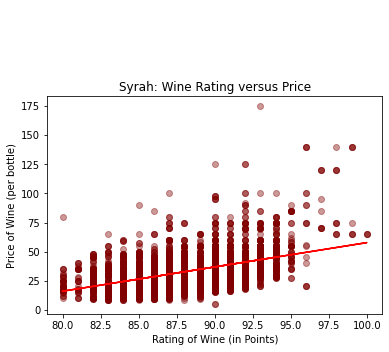

In [133]:
# Syrah
us_syrah_df = us_wine_df.loc[us_wine_df['Variety'] == 'Syrah']
x_values = us_syrah_df['Points']
y_values = us_syrah_df['Price']

wine_regression(x_values, y_values, 'Syrah')

In [134]:
## find Price outliers for boxplot (see below)
syrahs = np.asarray(us_syrah_df['Price'])  #Syrah

syrah_quartiles = pd.DataFrame(syrahs).quantile([.25,.5,.75], axis=0)
syrah_quartiles

,0
0.25,24.0
0.50,30.0
0.75,40.0


In [135]:
syrah_lowerq = syrah_quartiles.loc[0.25]  
syrah_median = syrah_quartiles.loc[0.50]
syrah_upperq = syrah_quartiles.loc[0.75]
syrah_iqr = syrah_upperq - syrah_lowerq

print(f'The lower quartile of Price for Cabernet Sauvignon is: {syrah_lowerq[0]}')
print(f'The upper quartile of Price for Cabernet Sauvignon is: {syrah_upperq[0]}')
print(f'The interquartile range of Price for Cabernet Sauvignon is: {syrah_iqr[0]}')
print(f'The median of Price for Cabernet Sauvignon is: {syrah_median[0]}')

syrah_lower_bound = syrah_lowerq - (1.5*syrah_iqr)
syrah_upper_bound = syrah_upperq + (1.5*syrah_iqr)

print(f'Syrah Price below {syrah_lower_bound[0]} could be outliers.')
print(f'Syrah Price above {syrah_upper_bound[0]} could be outliers.')

The lower quartile of Price for Cabernet Sauvignon is: 24.0
The upper quartile of Price for Cabernet Sauvignon is: 40.0
The interquartile range of Price for Cabernet Sauvignon is: 16.0
The median of Price for Cabernet Sauvignon is: 30.0
Syrah Price below 0.0 could be outliers.
Syrah Price above 64.0 could be outliers.


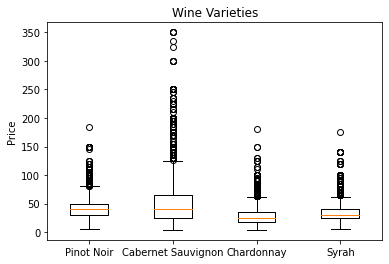

In [136]:
# Box plot for Pinot Noir, Cabernet Sauvignon, Chardonnay

columns = [pinots, cabs, chards, syrahs]

fig, ax = plt.subplots()
ax.set_title('Wine Varieties')
ax.set_ylabel('Price')  # per bottle?  update?
labels = ['Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay', 'Syrah']
ax.boxplot(columns, labels=labels)
plt.show()

In [46]:
# sharon's code ends here